In [3]:
import xtrack as xt

In [4]:
line = xt.Line.from_json('../../xtrack/test_data/hllhc15_thick/lhc_thick_with_knobs.json')

Loading line from dict:   0%|          | 0/14522 [00:00<?, ?it/s]

Done loading line from dict.           


### Working with variables

Value of a variable

In [9]:
line['on_x5']

0.0

Setting a variable to an expression

In [10]:
line['on_x1'] = '3 * on_x2'

Reference to a variable

In [14]:
line.ref['on_x1']._expr

(3.0 * vars['on_x2'])

Explicit expression

In [16]:
line.ref['on_x1']= 3 * line.ref['on_x5']

Assignment by value

In [17]:
line.ref['on_x1']= 3 * line['on_x5']

Full info

In [18]:
line.ref['on_x1']._info()

#  vars['on_x1']._get_value()
   vars['on_x1'] = 0.0

#  vars['on_x1']._expr is None

#  vars['on_x1']._find_dependant_targets()
   vars['on_x1vl']
   vars['on_dx1vl']
   vars['on_x1vs']
   vars['pyip1b2']
   vars['pyip1b1']
   vars['acbyv4.r1b2']
   vars['acbyv4.l1b1']
   element_refs['mcbyv.b4l1.b1'].ksl[0]
   ... set _info(limit=None) to get all lines



## Access elements

In [22]:
line['mcbyv.b4l1.b1']

View of Multipole(_order=np.int64(0), inv_factorial_order=1, length=0.9, hxl=0, radiation_flag=np.int64(0), delta_taper=0, knl=array([0.]), ksl=array([0.]), _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0, _internal_record_id=RecordIdentifier(buffer_id=np.int64(0), offset=np.int64(0)))

In [38]:
line['a'] = 0
line['mcbyv.b4l1.b1'].ksl[0] = 'a'

In [45]:
line.set('mcbyv.b4l1.b1', length='3*a', delta_taper='4*a', knl=['3*a'])

## Access modes

Three ways: `line[]`, `line.ref[]`, `line.get()`

**For elements:**

In [34]:
line['mcbyv.b4l1.b1']

View of Multipole(_order=np.int64(0), inv_factorial_order=1, length=0.9, hxl=0, radiation_flag=np.int64(0), delta_taper=0, knl=array([0.]), ksl=array([0.]), _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0, _internal_record_id=RecordIdentifier(buffer_id=np.int64(0), offset=np.int64(0)))

In [30]:
line.ref['mcbyv.b4l1.b1']

element_refs['mcbyv.b4l1.b1']

In [31]:
line.get('mcbyv.b4l1.b1')

Multipole(_order=np.int64(0), inv_factorial_order=1, length=0.9, hxl=0, radiation_flag=np.int64(0), delta_taper=0, knl=array([0.]), ksl=array([0.]), _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0, _internal_record_id=RecordIdentifier(buffer_id=np.int64(0), offset=np.int64(0)))

## Select

In [57]:
section = line.select('ip4', 'ip6')

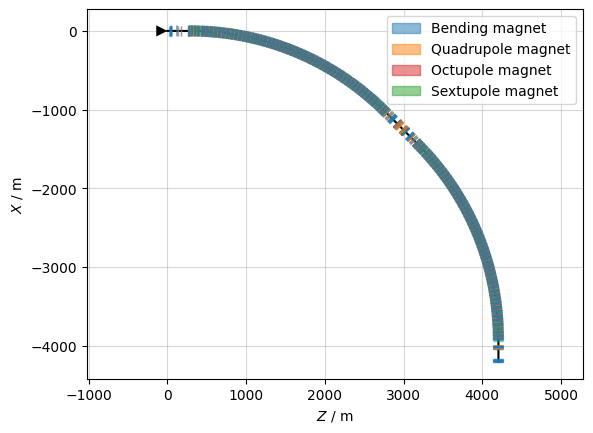

In [58]:
section.survey().plot()

**For vars:**

In [35]:
line['on_x1']

0.0

In [36]:
line.ref['on_x1']

vars['on_x1']

In [37]:
line.get('on_x1')

0.0

---------------

In [51]:
mline = -line

In [52]:
mline.get_table().rows[-10:]

Table: 10 rows, 7 cols
name                               s element_type isthick isreplica parent_name iscollective
bpmw.4r7.b1                  26600.9 Drift           True     False None               False
drift_2                      26600.9 Drift           True     False None               False
drift_mcbwv.4r7.b1..2        26603.8 Drift           True     False None               False
mcbwv.4r7.b1                 26604.7 Multipole      False     False None               False
drift_mcbwv.4r7.b1..1        26604.7 Drift           True     False None               False
drift_1                      26605.5 Drift           True     False None               False
tcsg.a4r7.b1                 26657.4 Drift           True     False None               False
drift_0                      26658.4 Drift           True     False None               False
ip7                          26658.9 Marker         False     False None               False
_end_point                   26658.9           

In [53]:
line.get_table().rows[:10]

Table: 10 rows, 7 cols
name                               s element_type isthick isreplica parent_name iscollective
ip7                                0 Marker         False     False None               False
drift_0                            0 Drift           True     False None               False
tcsg.a4r7.b1                     0.5 Drift           True     False None               False
drift_1                          1.5 Drift           True     False None               False
drift_mcbwv.4r7.b1..1         53.341 Drift           True     False None               False
mcbwv.4r7.b1                  54.191 Multipole      False     False None               False
drift_mcbwv.4r7.b1..2         54.191 Drift           True     False None               False
drift_2                       55.041 Drift           True     False None               False
bpmw.4r7.b1                  57.9855 Drift           True     False None               False
drift_3                      57.9855 Drift     

-------

In [ ]:
bld.place('m1', at=3, anchor=xt.START, from_='m1', from_anchor=xt.END)